In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
N_tosses = 100
N_heads = 46
# if the coin is biased of not
p_unbiased = 0.5
p_biased = 0.46

In [3]:
samples = np.random.binomial(n=N_tosses, p=p_unbiased, size=10000)
samples_biased = np.random.binomial(n=N_tosses, p=p_biased, size=10000)

In [4]:
samples

array([48, 48, 58, ..., 60, 41, 46])

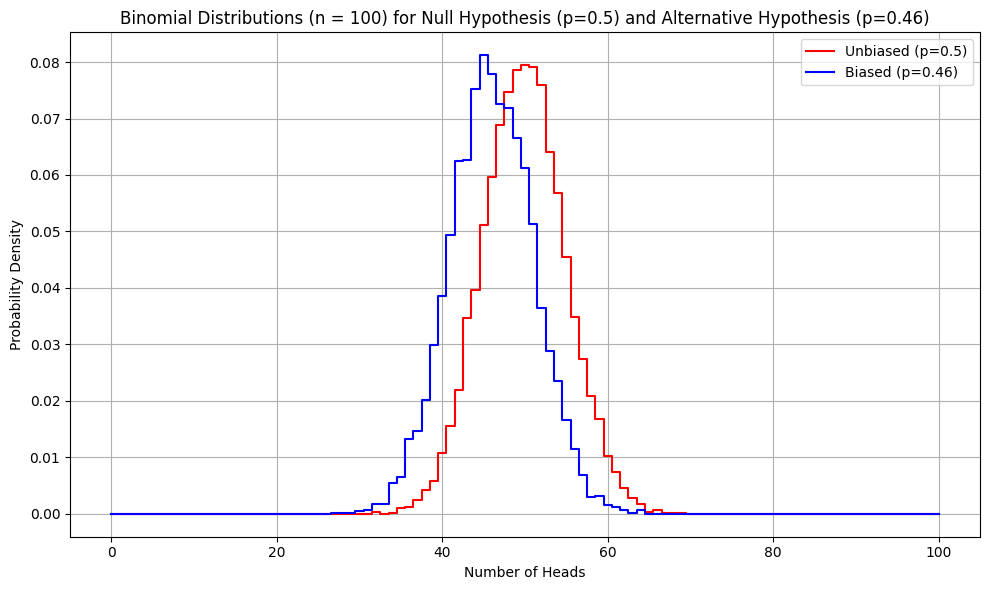

In [5]:
# Histogram binning
bins = np.arange(0, N_tosses + 2) - 0.5
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# Histogram (density=True for comparison)
counts_unbiased, bin_edges = np.histogram(samples, bins=bins, density=True)
counts_biased, bin_edges = np.histogram(samples_biased, bins=bins, density=True)

# Plot only the top outline
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, counts_unbiased, drawstyle='steps-mid', color='red', label='Unbiased (p=0.5)', linewidth=1.5)
plt.plot(bin_centers, counts_biased, drawstyle='steps-mid', color='blue', label='Biased (p=0.46)', linewidth=1.5)

plt.title("Binomial Distributions (n = 100) for Null Hypothesis (p=0.5) and Alternative Hypothesis (p=0.46)")
plt.xlabel("Number of Heads")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Estimated area under histogram from 0 to 46 heads = 0.2785
The p-value of the null hypothesis is 0.2785 at the critical boundary x = 46.00 heads


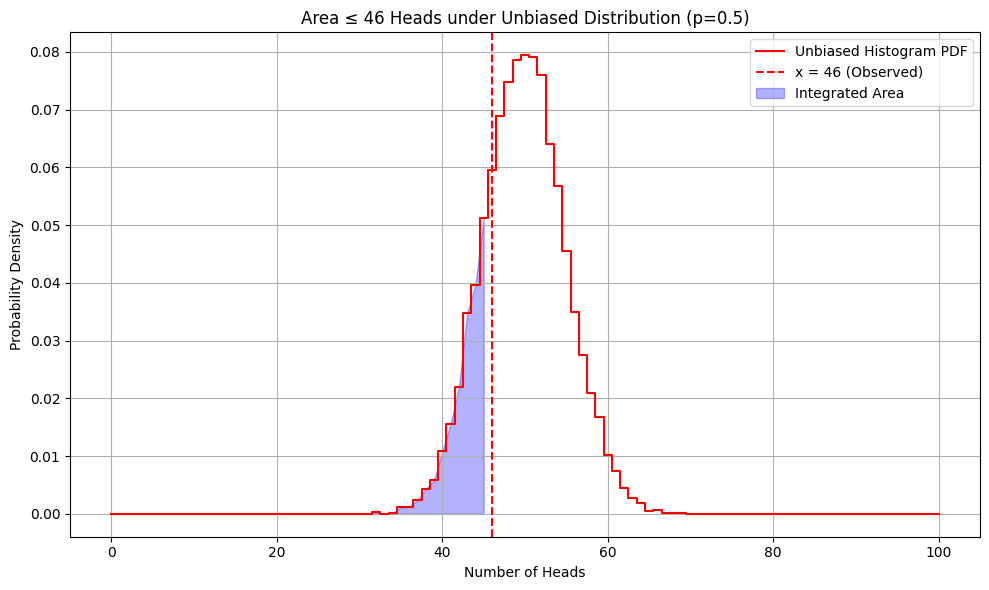

In [6]:

x0 = N_heads
bin_widths = np.diff(bin_edges)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Mask for bins less than x0
mask = bin_edges[:-1] < x0

# Area under histogram up to x0
integral = np.sum(counts_unbiased[mask] * bin_widths[mask])

# Handle partial bin at x0
if not np.isclose(x0, bin_edges).any():
    right_index = np.searchsorted(bin_edges, x0)
    left_edge = bin_edges[right_index - 1]
    width = x0 - left_edge
    integral += counts_unbiased[right_index - 1] * width

# Output
print(f"Estimated area under histogram from 0 to {x0} heads = {integral:.4f}")
print(f"The p-value of the null hypothesis is {integral:.4f} at the critical boundary x = {x0:.2f} heads")

# Plot using the same histogram bins and format
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, counts_unbiased, drawstyle='steps-mid', color='red', label='Unbiased Histogram PDF')
plt.axvline(x=x0, color='red', linestyle='--', label=f'x = {x0} (Observed)')
plt.fill_between(bin_centers, 0, counts_unbiased, where=(bin_centers < x0), color='blue', alpha=0.3, label='Integrated Area')
plt.xlabel('Number of Heads')
plt.ylabel('Probability Density')
plt.title(f'Area ≤ {x0} Heads under Unbiased Distribution (p=0.5)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Left critical boundary at 5% significance level: x = 42.50 heads


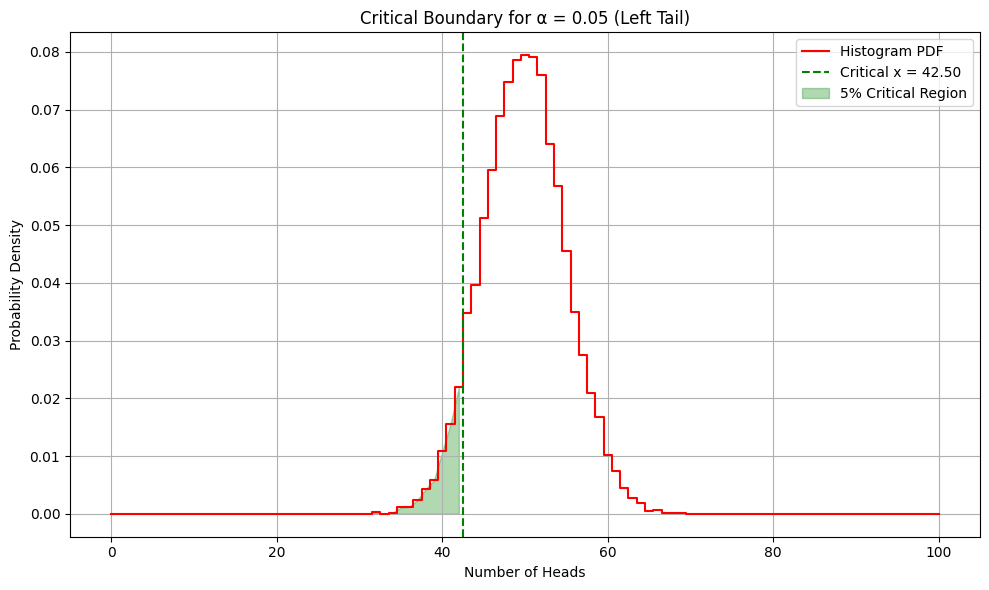

In [7]:
# Compute cumulative area under the histogram
cumulative_area = np.cumsum(counts_unbiased * bin_widths)

# Find the bin where cumulative area first exceeds 0.05
critical_index = np.searchsorted(cumulative_area, 0.05)
critical_value = bin_edges[critical_index + 1]  # right edge of that bin

print(f"Left critical boundary at 5% significance level: x = {critical_value:.2f} heads")

# Plot updated with critical region
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, counts_unbiased, drawstyle='steps-mid', color='red', label='Histogram PDF')
plt.axvline(x=critical_value, color='green', linestyle='--', label=f'Critical x = {critical_value:.2f}')
plt.fill_between(bin_centers, 0, counts_unbiased, where=(bin_centers < critical_value), color='green', alpha=0.3, label='5% Critical Region')
plt.xlabel('Number of Heads')
plt.ylabel('Probability Density')
plt.title(f'Critical Boundary for α = 0.05 (Left Tail)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Estimated area under histogram from 0 to 46 heads = 0.2452
The power of the alternate hypothesis is 0.2452 at the critical boundary x = 42.50 heads


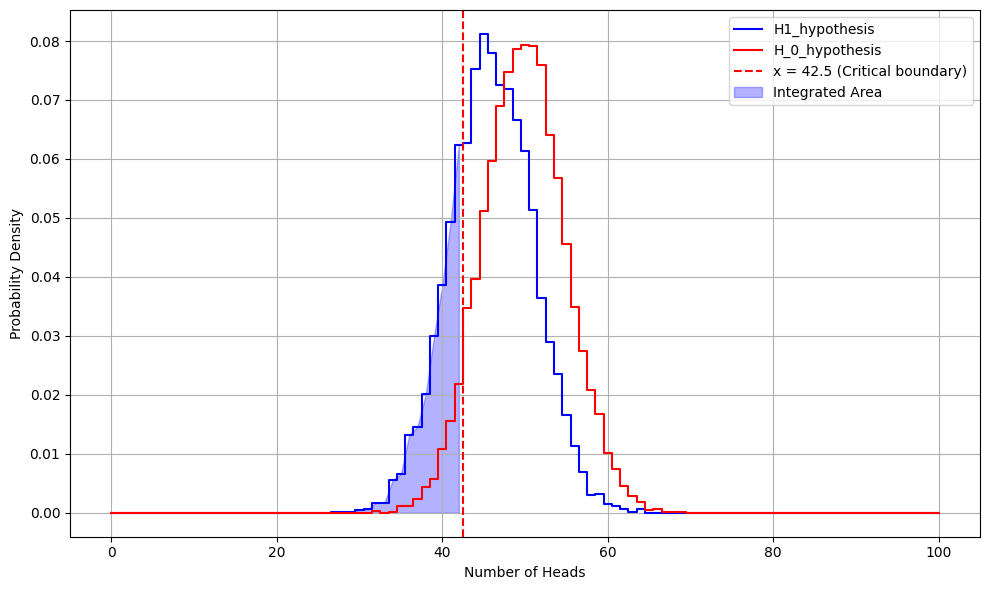

In [8]:
# Mask for bins less than x0
mask = bin_edges[:-1] < critical_value

# Area under histogram up to x0
integral = np.sum(counts_biased[mask] * bin_widths[mask])

# Handle partial bin at x0
if not np.isclose(critical_value, bin_edges).any():
    right_index = np.searchsorted(bin_edges, critical_value)
    left_edge = bin_edges[right_index - 1]
    width = x0 - left_edge
    integral += counts_biased[right_index - 1] * width

# Output
print(f"Estimated area under histogram from 0 to {x0} heads = {integral:.4f}")
print(f"The power of the alternate hypothesis is {integral:.4f} at the critical boundary x = {critical_value:.2f} heads")

# Plot using the same histogram bins and format
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, counts_biased, drawstyle='steps-mid', color='blue', label='H1_hypothesis')
plt.plot(bin_centers, counts_unbiased, drawstyle='steps-mid', color='red', label='H_0_hypothesis')
plt.axvline(x=critical_value, color='red', linestyle='--', label=f'x = {critical_value} (Critical boundary)')
plt.fill_between(bin_centers, 0, counts_biased, where=(bin_centers < critical_value), color='blue', alpha=0.3, label='Integrated Area')
plt.xlabel('Number of Heads')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# def L0(n,r,H_0):
#     return math.comb(n, r)*(H_0**r)*((1-H_0)**(n-r))

# def L1(n,r,H_1):
#     return math.comb(n, r)*(H_1**r)*((1-H_1)**(n-r))

# def log_likelihood_ratio(n, r, H_0, H_1):
#     L0_value = L0(n, r, H_0)
#     L1_value = L1(n, r, H_1)
#     return -2*np.log(L1_value / L0_value) if L0_value != 0 else np.inf

# llr_dist_H_0 = log_likelihood_ratio(N_tosses, samples, p_unbiased, p_biased)
# llr_dist_H_1 = log_likelihood_ratio(N_tosses, samples_biased, p_unbiased, p_biased)

import numpy as np
import math
from scipy.special import comb  # Vectorized version

def L(n, r_array, H):
    return comb(n, r_array) * (H ** r_array) * ((1 - H) ** (n - r_array))

def log_likelihood_ratio(n, r_array, H_0, H_1):
    L0_vals = L(n, r_array, H_0)
    L1_vals = L(n, r_array, H_1)

    # Use np.where to avoid divide-by-zero warnings
    return np.where(L1_vals != 0, -2 * np.log(L0_vals / L1_vals), np.inf)

# # Example usage
# N_tosses = 100
# p_unbiased = 0.5
# p_biased = 0.46

# samples = np.random.binomial(N_tosses, p_unbiased, 10000)
# samples_biased = np.random.binomial(N_tosses, p_biased, 10000)

llr_dist_H_0 = log_likelihood_ratio(N_tosses, samples, p_unbiased, p_biased)
llr_dist_H_1 = log_likelihood_ratio(N_tosses, samples_biased, p_unbiased, p_biased)


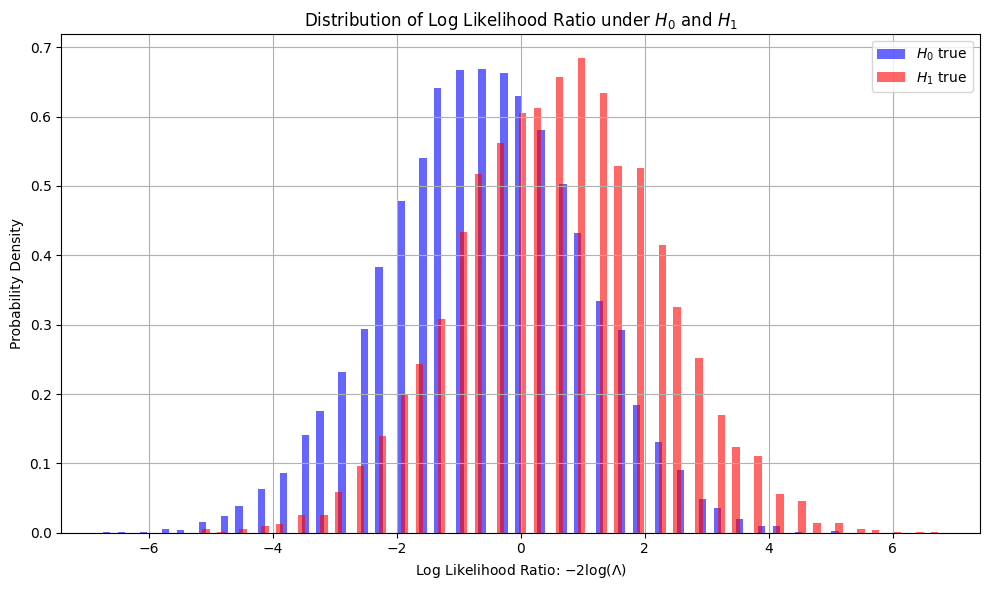

In [10]:
# Plot
plt.figure(figsize=(10, 6))
plt.hist(llr_dist_H_0, bins=100, density=True, alpha=0.6, label=r'$H_0$ true', color='blue')
plt.hist(llr_dist_H_1, bins=100, density=True, alpha=0.6, label=r'$H_1$ true', color='red')
plt.xlabel(r'Log Likelihood Ratio: $-2 \log(\Lambda)$')
plt.ylabel('Probability Density')
plt.title('Distribution of Log Likelihood Ratio under $H_0$ and $H_1$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Step 1: Find critical value from H0 distribution (right tail)
alpha = 0.05  # Significance level
critical_value = np.percentile(llr_dist_H_0, 100 * (1 - alpha))

# Step 2: Compute power as area under H1 to the right of critical value
power = np.mean(llr_dist_H_1 > critical_value)

print(f"Critical value at α = {alpha}: {critical_value:.4f}")
print(f"Power of the likelihood ratio test: {power:.4f}")

Critical value at α = 0.05: 1.9234
Power of the likelihood ratio test: 0.1828
